In [1]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 3.6 MB/s eta 0:00:00a 0:00:01


In [17]:
import umap
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context="paper", style="white")

mnist = fetch_openml("mnist_784", version=1)

reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(mnist.data)

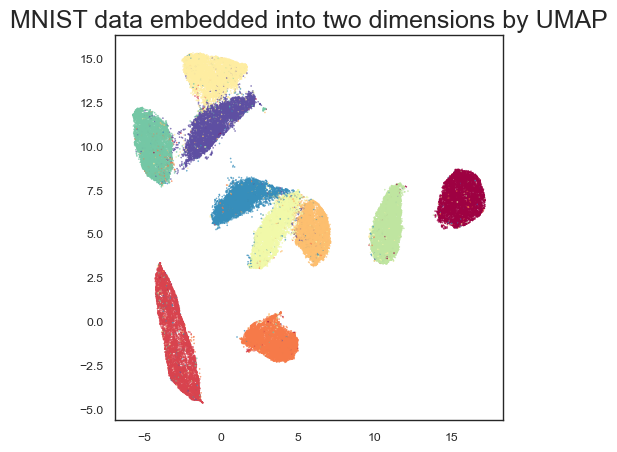

In [23]:
fig, ax = plt.subplots(figsize=(5, 5))
color = mnist.target.astype(int)
scatter = ax.scatter(embedding[:, 0], embedding[:, 1], c=color, cmap="Spectral", s=0.1)
ax.set_title("MNIST data embedded into two dimensions by UMAP", fontsize=18)
plt.show()

In [3]:
from sklearn.manifold import TSNE

In [4]:
mnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
tsne = TSNE(n_iter=300)
tsne_results = tsne.fit_transform(mnist.data)

/opt/miniconda3/envs/atlas/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


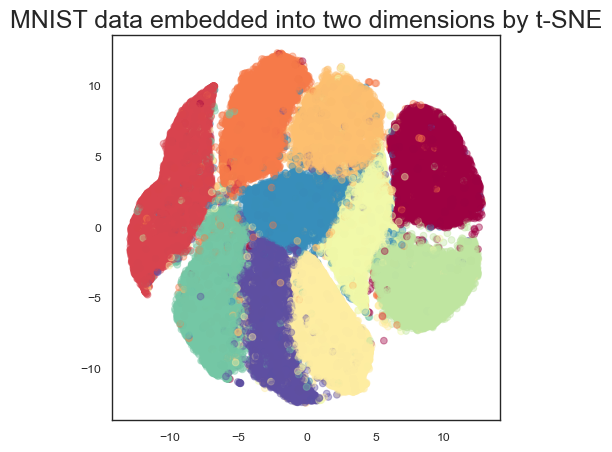

In [22]:
fig = plt.figure( figsize=(5,5) )
ax = fig.add_subplot(1, 1, 1, title='TSNE' )
ax.scatter(
    x=tsne_results[:,0], 
    y=tsne_results[:,1], 
    c=mnist.target.values.astype(int), 
    cmap="Spectral", 
    alpha=0.4)
ax.set_title("MNIST data embedded into two dimensions by t-SNE", fontsize=18)
plt.show()

In [31]:
from nomic import atlas

In [25]:


import os
import numpy as np
from PIL import Image

# Create a directory to save the images
output_dir = "mnist_images"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Reshape and save each image
for i in range(len(mnist.data)):
    if i % 1000 == 0: print(i)
    image_array = mnist.data.iloc[i].values.reshape(28, 28).astype(np.uint8)
    image = Image.fromarray(image_array)
    image.save(os.path.join(output_dir, f"mnist_image_{i}.png"))

print(f"Saved {len(mnist.data)} images to the folder '{output_dir}'")


0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
Saved 70000 images to the folder 'mnist_images'


In [26]:
import pandas as pd

# Create a DataFrame with the t-SNE embeddings, UMAP embeddings, and target labels
df = pd.DataFrame({
    'tsne_X': tsne_results[:, 0],
    'tsne_Y': tsne_results[:, 1],
    'umap_X': embedding[:, 0],
    'umap_Y': embedding[:, 1],
    'label': mnist.target.values
})



In [27]:
df

,tsne_X,tsne_Y,umap_X,umap_Y,label
0,4.665004,-0.192653,3.621705,5.030064,5
1,8.163254,5.283535,15.893705,6.497464,0
2,3.658561,-10.298058,1.023413,14.565120,4
3,-7.401831,6.960660,-4.215054,1.757049,1
4,-2.815566,-5.447657,-0.845539,11.141189,9
...,...,...,...,...,...
69995,-2.755637,5.974018,2.403614,-1.322001,2
69996,4.140834,7.922299,6.645492,5.655890,3
69997,0.292267,-4.142816,-1.874993,14.204451,4
69998,3.434571,-4.556406,2.225728,3.442498,5


In [28]:
blob_filenames = [os.path.join(output_dir, f"mnist_image_{i}.png") for i in range(len(mnist.data))]

In [32]:
atlas.map_data(
    blobs=blob_filenames,
    data=df,
    identifier="MNIST",
    description="Comparing dimensionality reduction methods"
)

2024-12-02 13:31:04.986 | WARNING  | nomic.atlas:map_data:128 - An ID field was not specified in your data so one was generated for you in insertion order.
2024-12-02 13:31:07.302 | INFO     | nomic.dataset:_create_project:857 - Creating dataset `mnist`
2024-12-02 13:31:07.650 | INFO     | nomic.atlas:map_data:140 - Uploading data to Atlas.
Loading images: 100%|██████████| 70000/70000 [00:07<00:00, 9274.10it/s]
Uploading blobs to Atlas: 70014it [21:39, 53.90it/s]                            
2024-12-02 13:52:54.294 | INFO     | nomic.atlas:map_data:158 - `nomic/mnist`: Data upload succeeded to dataset`
2024-12-02 13:52:54.706 | WARNING  | nomic.dataset:create_index:1100 - Ignoring indexed_field for image datasets. Only _blob_hash is supported.
2024-12-02 13:52:56.072 | INFO     | nomic.dataset:create_index:1262 - Created map `MNIST` in dataset `nomic/mnist`: https://atlas.nomic.ai/data/nomic/mnist


AtlasDataset: <{'id': 'ad6da3b4-9991-4717-90fd-7b90464848b7', 'owner': '6e59bf43-f579-46ef-a144-ec130ce2652e', 'project_name': 'MNIST', 'creator': 'google-oauth2|116194022103103208403', 'description': 'Comparing dimensionality reduction methods', 'is_public': True, 'is_public_to_org': True, 'project_fields': ['tsne_X', 'tsne_Y', 'umap_X', 'umap_Y', 'label', 'id_', '_blob_hash'], 'unique_id_field': 'id_', 'modality': 'image', 'total_datums_in_project': 70000, 'created_timestamp': '2024-12-02T18:31:07.068347+00:00', 'slug': 'mnist', 'og_image': 'https://atlas-content-production.s3.amazonaws.com/projects/ad6da3b4-9991-4717-90fd-7b90464848b7/og-map.png', 'atlas_indices': [{'id': '77ae2d3e-bab0-4e0b-abc3-cd84c4a14b79', 'project_id': 'ad6da3b4-9991-4717-90fd-7b90464848b7', 'index_name': 'MNIST', 'indexed_field': '_blob_hash', 'created_timestamp': '2024-12-02T18:52:55.198955+00:00', 'updated_timestamp': '2024-12-02T18:52:55.198955+00:00', 'atoms': ['charchunk', 'document'], 'colorable_fields': ['tsne_X', 'tsne_Y', 'umap_X', 'umap_Y', 'label'], 'embedders': [{'id': '50cc9189-8512-413c-998c-8eb18057eba0', 'atlas_index_id': '77ae2d3e-bab0-4e0b-abc3-cd84c4a14b79', 'ready': False, 'model_name': 'nomic-embed-vision-v1.5', 'hyperparameters': {'norm': 'both', 'batch_size': 20, 'polymerize_by': 'charchunk', 'dataset_buffer_size': 1000}}], 'nearest_neighbor_indices': [{'id': 'f7fbe2d0-1966-43d3-95c1-d154e6e86ff7', 'index_name': 'NomicOrganize', 'ready': False, 'hyperparameters': {'M': 16, 'space': 'l2', 'ef_construction': 100}, 'atom_strategies': ['document']}], 'projections': [{'id': 'b2898ac5-f001-47df-b60b-d22e1f45b4f1', 'projection_name': 'NomicProject', 'ready': False, 'hyperparameters': {'rho': 0.1, 'model': 'nomic-project-v2', 'spread': 1, 'n_noise': None, 'min_dist': 0.4, 'n_epochs': 50, 'n_neighbors': 15, 'n_init_epochs': 20, 'local_neighborhood_size': 64}, 'atom_strategies': ['document'], 'created_timestamp': '2024-12-02T18:52:55.220759+00:00', 'updated_timestamp': '2024-12-02T18:52:55.220759+00:00', 'thumbnail': 'https://atlas-content-production.s3.amazonaws.com/projects/ad6da3b4-9991-4717-90fd-7b90464848b7/b2898ac5-f001-47df-b60b-d22e1f45b4f1/map.png', 'og_image': 'https://atlas-content-production.s3.amazonaws.com/projects/ad6da3b4-9991-4717-90fd-7b90464848b7/b2898ac5-f001-47df-b60b-d22e1f45b4f1/og-map.png'}]}], 'insert_update_delete_lock': True, 'access_role': 'ADMIN', 'permissions': {'dataset:administration:read': True, 'dataset:administration:write': True, 'dataset:metadata:read': True, 'dataset:metadata:write': True, 'dataset:data:read': True, 'dataset:data:write': True, 'dataset:data:add': True, 'dataset:data:delete': True, 'dataset:resource:create': True, 'dataset:resource:delete': True, 'dataset:members:read': True, 'dataset:members:write': True, 'dataset:tags:read': True, 'dataset:tags:write': True}, 'schema': '//////ABAAAQAAAAAAAKAA4ABgAFAAgACgAAAAABBAAQAAAAAAAKAAwAAAAEAAgACgAAAGAAAAAEAAAAAQAAAAwAAAAIAAwABAAIAAgAAAA0AAAABAAAACQAAABhZDZkYTNiNC05OTkxLTQ3MTctOTBmZC03YjkwNDY0ODQ4YjcAAAAACgAAAHByb2plY3RfaWQAAAcAAAAsAQAA7AAAALwAAACMAAAAXAAAADQAAAAEAAAAAP///wAAAQUQAAAAHAAAAAQAAAAAAAAACgAAAF9ibG9iX2hhc2gAALT///8s////AAABBRAAAAAUAAAABAAAAAAAAAADAAAAaWRfANj///9Q////AAABBRAAAAAcAAAABAAAAAAAAAAFAAAAbGFiZWwAAAAEAAQABAAAAHz///8AAAEDEAAAABgAAAAEAAAAAAAAAAYAAAB1bWFwX1kAAGr///8AAAEAqP///wAAAQMQAAAAGAAAAAQAAAAAAAAABgAAAHVtYXBfWAAAlv///wAAAQDU////AAABAxAAAAAYAAAABAAAAAAAAAAGAAAAdHNuZV9ZAADC////AAABABAAFAAIAAYABwAMAAAAEAAQAAAAAAABAxAAAAAgAAAABAAAAAAAAAAGAAAAdHNuZV9YAAAAAAYACAAGAAYAAAAAAAEA', 'organization_slug': 'nomic', 'organization_name': 'Nomic', 'creator_nickname': 'max6', 'creator_picture': 'https://lh3.googleusercontent.com/a/ACg8ocJKxBMlt_PLxGbbQzq2Dk2EBTuhRW6eWCEFD6CrMR6hHjspEw=s96-c'}>